### Assignment 1 ###

Query the training database you used in homework 4-1 and query the noise_311 table Perform a basic statistical analysis of the time a complaint is left open Compare the results to what you found for DOT complaints. 
Submit this as Do Now 5

Host: training.c1erymiua9dx.us-east-1.rds.amazonaws.com

Port: 5432

Database: training

Username: dot_student

Password: qgis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import dateutil.parser
import pg8000
from pandas import DataFrame


In [ ]:
conn.re

In [19]:
conn = pg8000.connect(host="training.c1erymiua9dx.us-east-1.rds.amazonaws.com", user='dot_student', password='qgis', database='training')
cursor = conn.cursor()

ProgrammingError: ('FATAL', '53300', 'remaining connection slots are reserved for non-replication superuser and rds_superuser connections', 'postinit.c', '744', 'InitPostgres', '', '')

In [20]:
cursor.execute("select column_name from information_schema.columns where table_name='noise_311'")
column_list = []
for row in cursor.fetchall():
    column_list.append(row[0])
column_list

['unique_key',
 'created_date',
 'closed_date',
 'agency',
 'agency_name',
 'complaint_type',
 'descriptor',
 'location_type',
 'incident_zip',
 'incident_address',
 'street_name',
 'cross_street_1',
 'cross_street_2',
 'intersection_street_1',
 'intersection_street_2',
 'address_type',
 'city',
 'landmark',
 'facility_type',
 'status',
 'due_date',
 'resolution_description',
 'resolution_action_updated_date',
 'community_board',
 'borough',
 'x_coordinate',
 'y_coordinate',
 'park_facility_name',
 'park_borough',
 'school_name',
 'school_number',
 'school_region',
 'school_code',
 'school_phone_number',
 'school_address',
 'school_city',
 'school_state',
 'school_zip',
 'school_not_found',
 'school_or_citywide_complaint',
 'vehicle_type',
 'taxi_company_borough',
 'taxi_pick_up_location',
 'bridge_highway_name',
 'bridge_highway_direction',
 'road_ramp',
 'bridge_highway_segment',
 'garage_lot_name',
 'ferry_direction',
 'ferry_terminal_name',
 'latitude',
 'longitude',
 'location']

In [21]:
response = "select * from noise_311"

In [22]:
cursor.execute("select * from noise_311")
output = []
for row in cursor.fetchall():
    output.append(row)


In [23]:
df = pd.DataFrame(data=output, columns=column_list)

In [24]:
df.head(3)

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,garage_lot_name,ferry_direction,ferry_terminal_name,latitude,longitude,location
0,28792167,2014-08-31 23:59:00,2014-09-01 03:52:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11222,200 KINGSLAND AVENUE,...,None,None,None,None,None,None,None,40.7238883,-73.94134889,"(40.723888303549415, -73.94134888943505)"
1,28789088,2014-08-31 23:56:00,2014-09-01 06:17:00,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,11234,FLATLANDS AVENUE,...,None,None,None,None,None,None,None,40.61948901,-73.93805105,"(40.61948901090983, -73.93805104516916)"
2,28791854,2014-08-31 23:54:00,2014-09-01 01:29:00,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10002,161 LUDLOW STREET,...,None,None,None,None,None,None,None,40.72141034,-73.98769444,"(40.72141034382407, -73.98769444021134)"


In [27]:
sel_df = df[[
 'unique_key',
 'agency',
 'agency_name',
 'created_date',
 'closed_date',                  
 'complaint_type',
 'descriptor',
 'status',
 'due_date',
 'resolution_description',
 'city',
 'borough'
 ]]

In [28]:
sel_df.head(3)

,unique_key,agency,agency_name,created_date,closed_date,complaint_type,descriptor,status,due_date,resolution_description,city,borough
0,28792167,NYPD,New York City Police Department,2014-08-31 23:59:00,2014-09-01 03:52:00,Noise - Street/Sidewalk,Loud Music/Party,Closed,9/1/14 7:59,None,BROOKLYN,BROOKLYN
1,28789088,NYPD,New York City Police Department,2014-08-31 23:56:00,2014-09-01 06:17:00,Noise - Vehicle,Car/Truck Music,Closed,9/1/14 7:56,None,BROOKLYN,BROOKLYN
2,28791854,NYPD,New York City Police Department,2014-08-31 23:54:00,2014-09-01 01:29:00,Noise - Commercial,Loud Music/Party,Closed,9/1/14 7:54,None,NEW YORK,MANHATTAN


In [29]:
sel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37615 entries, 0 to 37614
Data columns (total 12 columns):
unique_key                37615 non-null int64
agency                    37615 non-null object
agency_name               37615 non-null object
created_date              37615 non-null datetime64[ns]
closed_date               37615 non-null datetime64[ns]
complaint_type            37615 non-null object
descriptor                37615 non-null object
status                    37615 non-null object
due_date                  34758 non-null object
resolution_description    0 non-null object
city                      37602 non-null object
borough                   37615 non-null object
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 2.2+ MB


In [78]:
#dateutil.parser.parse("2016-02-01 00:15:00")

In [30]:
sel_df['ClosedDate'] = pd.to_datetime(sel_df['closed_date'], format='%m/%d/%y %H:%M:%S')
sel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37615 entries, 0 to 37614
Data columns (total 13 columns):
unique_key                37615 non-null int64
agency                    37615 non-null object
agency_name               37615 non-null object
created_date              37615 non-null datetime64[ns]
closed_date               37615 non-null datetime64[ns]
complaint_type            37615 non-null object
descriptor                37615 non-null object
status                    37615 non-null object
due_date                  34758 non-null object
resolution_description    0 non-null object
city                      37602 non-null object
borough                   37615 non-null object
ClosedDate                37615 non-null datetime64[ns]
dtypes: datetime64[ns](3), int64(1), object(9)
memory usage: 2.4+ MB


c:\users\radhika\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [31]:
#no need to do this step as created date and closed date are already in datetime format
sel_df['CreatedDate'] = pd.to_datetime(sel_df['created_date'], format='%m/%d/%y %H:%M:%S')
sel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37615 entries, 0 to 37614
Data columns (total 14 columns):
unique_key                37615 non-null int64
agency                    37615 non-null object
agency_name               37615 non-null object
created_date              37615 non-null datetime64[ns]
closed_date               37615 non-null datetime64[ns]
complaint_type            37615 non-null object
descriptor                37615 non-null object
status                    37615 non-null object
due_date                  34758 non-null object
resolution_description    0 non-null object
city                      37602 non-null object
borough                   37615 non-null object
ClosedDate                37615 non-null datetime64[ns]
CreatedDate               37615 non-null datetime64[ns]
dtypes: datetime64[ns](4), int64(1), object(9)
memory usage: 2.7+ MB


c:\users\radhika\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [32]:
sel_df['delay'] = sel_df['ClosedDate'] - sel_df['CreatedDate']
sel_df['delay'].head(3)

c:\users\radhika\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


0   03:53:00
1   06:21:00
2   01:35:00
Name: delay, dtype: timedelta64[ns]

In [34]:
sel_df['delay'].isnull().value_counts()

False    37615
Name: delay, dtype: int64

In [35]:
delay_delta = pd.DataFrame(sel_df['delay'][sel_df['delay']> pd.Timedelta(seconds=0)].dropna())
delay_delta.describe()

,delay
count,37615
mean,0 days 07:44:22.532500
std,1 days 12:06:09.012799
min,0 days 00:01:00
25%,0 days 00:54:00
50%,0 days 02:02:00
75%,0 days 04:15:00
max,48 days 05:45:00


In [36]:
delay_delta.head()

,delay
0,03:53:00
1,06:21:00
2,01:35:00
3,03:01:00
4,01:19:00


In [37]:
#now all the null values have been removed. great ! now i can test with a dataframe.
delay_delta['delay'].isnull().value_counts()

False    37615
Name: delay, dtype: int64

In [41]:
#changing the delta value to seconds so that we can plot easily
delay_delta['delay'].astype('timedelta64[m]')

0        233.0
1        381.0
2         95.0
3        181.0
4         79.0
5        186.0
6         64.0
7        258.0
8        288.0
9        205.0
10       292.0
11       156.0
12       234.0
13       313.0
14       186.0
15        60.0
16       207.0
17       812.0
18       105.0
19       168.0
20       354.0
21         7.0
22        33.0
23       171.0
24       327.0
25        21.0
26       132.0
27       166.0
28       176.0
29       313.0
         ...  
37585    182.0
37586    254.0
37587    111.0
37588    264.0
37589     42.0
37590    376.0
37591    111.0
37592     39.0
37593    287.0
37594     47.0
37595     50.0
37596    118.0
37597     88.0
37598    117.0
37599    127.0
37600    141.0
37601    185.0
37602    176.0
37603     55.0
37604     74.0
37605     95.0
37606    842.0
37607    192.0
37608    102.0
37609     72.0
37610    624.0
37611    144.0
37612    278.0
37613    134.0
37614    458.0
Name: delay, dtype: float64

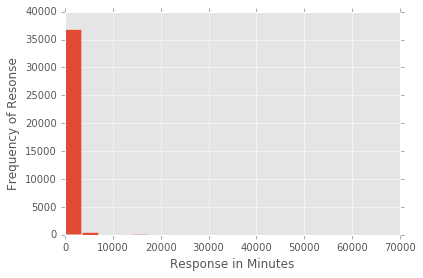

In [43]:
# plotting time delata in days bucket
delay_delta['delay'].astype('timedelta64[m]').hist(bins=20)
plt.xlabel('Response in Minutes')
plt.ylabel('Frequency of Resonse')

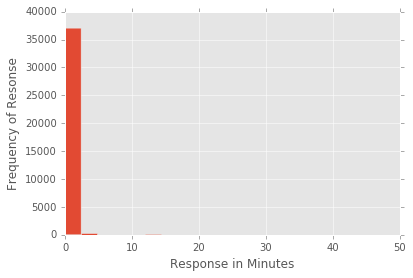

In [44]:
# plotting time delata in days bucket
delay_delta['delay'].astype('timedelta64[D]').hist(bins=20)
plt.xlabel('Response in Minutes')
plt.ylabel('Frequency of Resonse')

In [21]:
delay_delta['delay'].head()

0   01:03:00
1   00:40:00
2   01:15:00
3   02:18:00
4   00:41:00
Name: delay, dtype: timedelta64[ns]

In [46]:
sel_df.head(3)

,unique_key,agency,agency_name,created_date,closed_date,complaint_type,descriptor,status,due_date,resolution_description,city,borough,ClosedDate,CreatedDate,delay
0,28792167,NYPD,New York City Police Department,2014-08-31 23:59:00,2014-09-01 03:52:00,Noise - Street/Sidewalk,Loud Music/Party,Closed,9/1/14 7:59,None,BROOKLYN,BROOKLYN,2014-09-01 03:52:00,2014-08-31 23:59:00,03:53:00
1,28789088,NYPD,New York City Police Department,2014-08-31 23:56:00,2014-09-01 06:17:00,Noise - Vehicle,Car/Truck Music,Closed,9/1/14 7:56,None,BROOKLYN,BROOKLYN,2014-09-01 06:17:00,2014-08-31 23:56:00,06:21:00
2,28791854,NYPD,New York City Police Department,2014-08-31 23:54:00,2014-09-01 01:29:00,Noise - Commercial,Loud Music/Party,Closed,9/1/14 7:54,None,NEW YORK,MANHATTAN,2014-09-01 01:29:00,2014-08-31 23:54:00,01:35:00


In [47]:
delay_delta['delay'].head()

0   03:53:00
1   06:21:00
2   01:35:00
3   03:01:00
4   01:19:00
Name: delay, dtype: timedelta64[ns]

In [48]:
delay_delta['delay'].value_counts().head()

00:21:00    222
00:10:00    221
00:36:00    212
00:33:00    211
00:31:00    210
Name: delay, dtype: int64

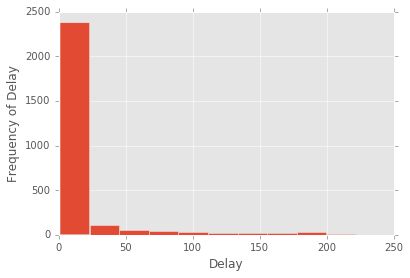

In [49]:
delay_delta['delay'].value_counts().hist()
plt.xlabel('Delay')
plt.ylabel('Frequency of Delay')

In [51]:
delay_plot = pd.DataFrame(delay_delta['delay'].value_counts())
delay_plot.head()

,delay
00:21:00,222
00:10:00,221
00:36:00,212
00:33:00,211
00:31:00,210


In [51]:
delay_delta['delay'].describe()

count                     37615
mean     0 days 07:44:22.532500
std      1 days 12:06:09.012799
min             0 days 00:01:00
25%             0 days 00:54:00
50%             0 days 02:02:00
75%             0 days 04:15:00
max            48 days 05:45:00
Name: delay, dtype: object

ERROR! Session/line number was not unique in database. History logging moved to new session 508


KeyboardInterrupt: 

In [52]:
delay_delta['delay'].quantile(q=0.25)

Timedelta('0 days 00:54:00')

ERROR! Session/line number was not unique in database. History logging moved to new session 509


In [53]:
delay_delta['delay'].quantile(q=0.5)

Timedelta('0 days 02:02:00')

In [54]:
delay_delta['delay'].quantile(q=0.75)

Timedelta('0 days 04:15:00')